# Binary Classification Task

https://arxiv.org/pdf/1502.02590

This is a tutorial for computing adversarial robustness for binary classification.  

Let the ground truth data set be points in 2d separated by a line.
Points above, below the line are in class $C_+=1$ and $C_-=-1$ respectively.

First we setup some imports and setup a labeller for the ground truth classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

## Classifying Plane Distributed Points

In [2]:
# computes the distance between a point and a line
def distance(pt, line):
    a = line[0]
    b = line[1]
    return np.sqrt(np.linalg.norm(pt-a)**2*np.linalg.norm(a-b)**2 - np.dot(pt-a,a-b)**2)

# The ground truth for points above/below the line going from origin through [1,1]
def labeller(pt):
    a = np.array([0,0])
    b = np.array([1,1]) # line goes from a to b
    return np.cross(a-b,pt-a)/distance(pt, [a,b])

Manually verifying a few points by hand

In [3]:
print(labeller([2,1]))
print(labeller([2,2]))
print(labeller([1,2]))

0.9999999999999982
0.0
-0.9999999999999982


Visualize the data

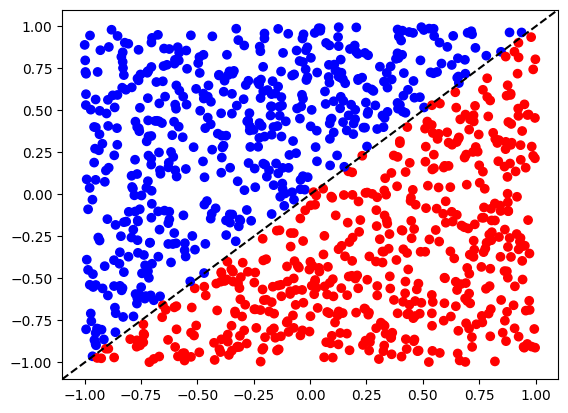

In [4]:
points = 2*np.random.rand(1000,2) - 1
plt.scatter(points[:,0],points[:,1],c=[labeller(p) for p in points], cmap='bwr')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color='black', linestyle='dashed')

plt.show()

### Straight Line Classifier

Lets use as our first classifier a straight line going through the points $a$ and $b$.  This classifier has 4 parameters, and we already know the optimal classifier is any line that goes through the origin with a slope of 1.  

In [5]:
class LineClassifier:
    def __init__(self,a,b):
        self.a = a
        self.b = b

    def __call__(self,pt):
        return np.cross(self.a-self.b,pt-self.a)/distance(pt, [self.a,self.b])

    def compute_risk(self, data):
        cp_count = 0
        cm_count = 0
        for point in data:
            if np.sign(self(point))>0:
                cp_count += 1
            elif np.sign(self(point))<0:
                cm_count += 1
            else:
                print("what")
                continue
        # the true data is half above the line, half below the line
        return 0.5*(float(cp_count)/float(len(data))) - 0.5*(float(cm_count)/float(len(data)))

    def compute_rho_adv(self, data):
        dist = 0.0
        for point in data:
            dist += distance(point, [self.a, self.b])
        return dist/float(len(data))

    def compute_accuracy(self, data):
        correct = 0
        for point in data:
            if np.sign(self(point)) == np.sign(labeller(point)):
                correct+=1
        return float(100*correct)/float(len(data))

    def report(self, data):
        accuracy = self.compute_accuracy(data)
        risk= self.compute_risk(data)
        rho_adv = self.compute_rho_adv(data)

        display(Math(rf'\text{{Accuracy}}={accuracy}\,\%'))
        risk_str = (f'{risk:.2e}').replace('e','\\times 10^{')+'}'
        display(Math(rf'R={risk_str}'))
        display(Math(rf'\rho_{{\text{{adv}} }}={rho_adv:.4f}'))
        
        plt.scatter(data[:,0],data[:,1],c=[self(point) for point in data], cmap='bwr')
        #plt.xlim(-0.1,1.1)
        #plt.ylim(-0.1,1.1)
        xpoints = ypoints = plt.xlim()
        plt.plot(xpoints, ypoints, color='black', linestyle='dashed')
        plt.axline(xy1=self.a,xy2=self.b, color='black')
        plt.gca().set_aspect('equal')
        plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

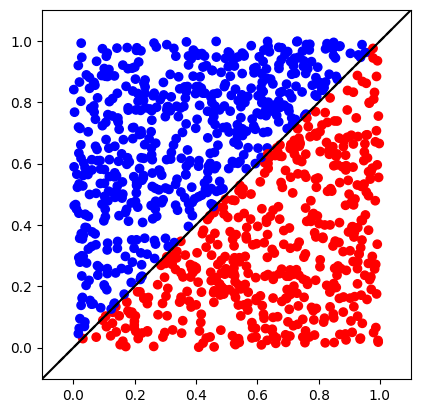

In [6]:
N=1000
dataset = np.random.rand(N,2)
c = LineClassifier(np.array([0,0.0]),np.array([1,1]))
c.report(dataset)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

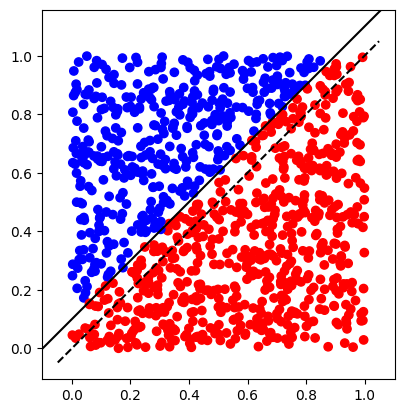

In [7]:
N=1000
dataset = np.random.rand(N,2)
c = LineClassifier(np.array([0,0.1]),np.array([1,1.1]))
c.report(dataset)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

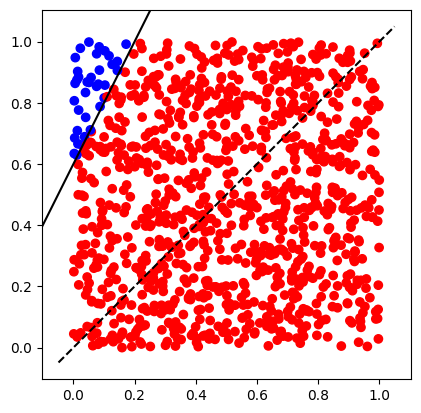

In [8]:
c = LineClassifier(np.array([0,0.6]),np.array([0.2,1.0]))
c.report(dataset)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

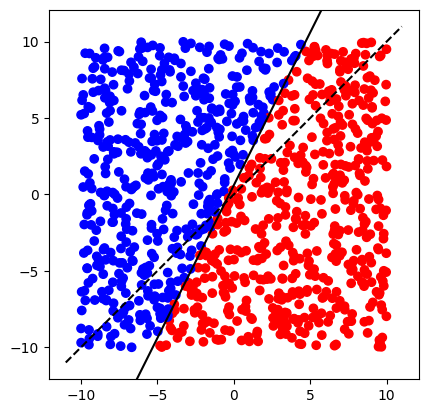

In [9]:
N=1000
A=10
dataset = A*2*np.random.rand(N,2)-A
c = LineClassifier(np.array([0,0.6]),np.array([0.2,1.0]))
c.report(dataset)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

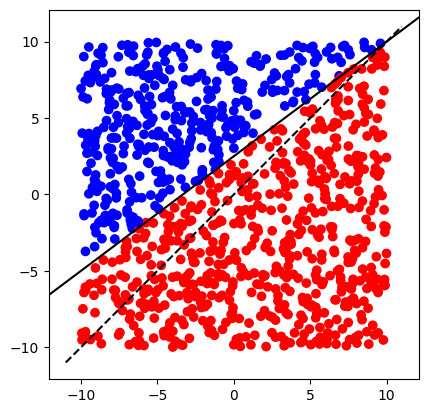

In [10]:
N=1000
A=10
dataset = A*2*np.random.rand(N,2)-A
c = LineClassifier(np.array([-10,-5]),np.array([10,10]))
c.report(dataset)

## Classifying clusters